In [2]:
#Multiple Linear Regression With scikit-learn
import pandas
import numpy as np
import seaborn as sns


In [3]:
df = pandas.read_csv("sorted_data.csv") 
df.head()

,FIPS,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,Year
0,12-31-2020,Tamil Nadu,01-01-2021 05:23,11.006091,78.400624,817077,12109,796353,8615.0,"Tamil Nadu, India",1049.670736,1.481990,2020
1,12-30-2020,Tamil Nadu,31-12-2020 05:22,11.006091,78.400624,817077,12109,796353,8615.0,"Tamil Nadu, India",1049.670736,1.481990,2020
2,12-29-2020,Tamil Nadu,30-12-2020 05:22,11.006091,78.400624,816132,12092,795293,8747.0,"Tamil Nadu, India",1048.456727,1.481623,2020
3,12-28-2020,Tamil Nadu,29-12-2020 05:22,11.006091,78.400624,815175,12080,794228,8867.0,"Tamil Nadu, India",1047.227302,1.481890,2020
4,12-27-2020,Tamil Nadu,28-12-2020 05:22,11.006091,78.400624,814170,12069,793154,8947.0,"Tamil Nadu, India",1045.936213,1.482369,2020


In [4]:
df.tail()

,FIPS,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,Year
998,01-05-2023,Tamil Nadu,06-01-2023 04:21,11.006091,78.400624,3594487,38049,"Tamil Nadu, India",4617.713892,1.0585377,NaN,NaN,2023
999,01-04-2023,Tamil Nadu,05-01-2023 04:21,11.006091,78.400624,3594478,38049,"Tamil Nadu, India",4617.702330,1.05854035,NaN,NaN,2023
1000,01-03-2023,Tamil Nadu,04-01-2023 04:21,11.006091,78.400624,3594466,38049,"Tamil Nadu, India",4617.686914,1.058543884,NaN,NaN,2023
1001,01-02-2023,Tamil Nadu,03-01-2023 04:21,11.006091,78.400624,3594456,38049,"Tamil Nadu, India",4617.674067,1.058546829,NaN,NaN,2023
1002,01-01-2023,Tamil Nadu,02-01-2023 04:20,11.006091,78.400624,3594444,38049,"Tamil Nadu, India",4617.658651,1.058550363,NaN,NaN,2023


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 1003 non-null   object 
 1   Province_State       1003 non-null   object 
 2   Last_Update          1003 non-null   object 
 3   Lat                  1003 non-null   float64
 4   Long_                1003 non-null   float64
 5   Confirmed            1003 non-null   int64  
 6   Deaths               1003 non-null   int64  
 7   Recovered            1003 non-null   object 
 8   Active               1003 non-null   float64
 9   Combined_Key         1003 non-null   object 
 10  Incident_Rate        421 non-null    float64
 11  Case_Fatality_Ratio  421 non-null    float64
 12  Year                 1003 non-null   int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 102.0+ KB


In [6]:
df['Recovered'] = df['Recovered'].apply(pandas.to_numeric, errors='coerce')

In [7]:
updated_df = df

In [8]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 1003 non-null   object 
 1   Province_State       1003 non-null   object 
 2   Last_Update          1003 non-null   object 
 3   Lat                  1003 non-null   float64
 4   Long_                1003 non-null   float64
 5   Confirmed            1003 non-null   int64  
 6   Deaths               1003 non-null   int64  
 7   Recovered            421 non-null    float64
 8   Active               1003 non-null   float64
 9   Combined_Key         1003 non-null   object 
 10  Incident_Rate        421 non-null    float64
 11  Case_Fatality_Ratio  421 non-null    float64
 12  Year                 1003 non-null   int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 102.0+ KB


In [9]:
# updated_df['Recovered']=updated_df['Recovered'].fillna(updated_df['Recovered'].mean())
# updated_df['Incident_Rate']=updated_df['Incident_Rate'].fillna(updated_df['Incident_Rate'].mean())
# updated_df['Case_Fatality_Ratio']=updated_df['Case_Fatality_Ratio'].fillna(updated_df['Case_Fatality_Ratio'].mean())
updated_df['Recovered']=updated_df['Recovered'].fillna(updated_df['Recovered'].median())
updated_df['Incident_Rate']=updated_df['Incident_Rate'].fillna(updated_df['Incident_Rate'].mean())
updated_df['Case_Fatality_Ratio']=updated_df['Case_Fatality_Ratio'].fillna(updated_df['Case_Fatality_Ratio'].mean())

In [10]:
updated_df.isnull().sum()

FIPS                   0
Province_State         0
Last_Update            0
Lat                    0
Long_                  0
Confirmed              0
Deaths                 0
Recovered              0
Active                 0
Combined_Key           0
Incident_Rate          0
Case_Fatality_Ratio    0
Year                   0
dtype: int64

In [11]:
updated_df.tail()

,FIPS,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,Year
998,01-05-2023,Tamil Nadu,06-01-2023 04:21,11.006091,78.400624,3594487,38049,803328.0,4617.713892,1.0585377,1268.847776,1.432861,2023
999,01-04-2023,Tamil Nadu,05-01-2023 04:21,11.006091,78.400624,3594478,38049,803328.0,4617.702330,1.05854035,1268.847776,1.432861,2023
1000,01-03-2023,Tamil Nadu,04-01-2023 04:21,11.006091,78.400624,3594466,38049,803328.0,4617.686914,1.058543884,1268.847776,1.432861,2023
1001,01-02-2023,Tamil Nadu,03-01-2023 04:21,11.006091,78.400624,3594456,38049,803328.0,4617.674067,1.058546829,1268.847776,1.432861,2023
1002,01-01-2023,Tamil Nadu,02-01-2023 04:20,11.006091,78.400624,3594444,38049,803328.0,4617.658651,1.058550363,1268.847776,1.432861,2023


In [12]:
updated_df.head()

,FIPS,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,Year
0,12-31-2020,Tamil Nadu,01-01-2021 05:23,11.006091,78.400624,817077,12109,796353.0,8615.0,"Tamil Nadu, India",1049.670736,1.481990,2020
1,12-30-2020,Tamil Nadu,31-12-2020 05:22,11.006091,78.400624,817077,12109,796353.0,8615.0,"Tamil Nadu, India",1049.670736,1.481990,2020
2,12-29-2020,Tamil Nadu,30-12-2020 05:22,11.006091,78.400624,816132,12092,795293.0,8747.0,"Tamil Nadu, India",1048.456727,1.481623,2020
3,12-28-2020,Tamil Nadu,29-12-2020 05:22,11.006091,78.400624,815175,12080,794228.0,8867.0,"Tamil Nadu, India",1047.227302,1.481890,2020
4,12-27-2020,Tamil Nadu,28-12-2020 05:22,11.006091,78.400624,814170,12069,793154.0,8947.0,"Tamil Nadu, India",1045.936213,1.482369,2020


In [13]:
updated_df.tail()

,FIPS,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,Year
998,01-05-2023,Tamil Nadu,06-01-2023 04:21,11.006091,78.400624,3594487,38049,803328.0,4617.713892,1.0585377,1268.847776,1.432861,2023
999,01-04-2023,Tamil Nadu,05-01-2023 04:21,11.006091,78.400624,3594478,38049,803328.0,4617.702330,1.05854035,1268.847776,1.432861,2023
1000,01-03-2023,Tamil Nadu,04-01-2023 04:21,11.006091,78.400624,3594466,38049,803328.0,4617.686914,1.058543884,1268.847776,1.432861,2023
1001,01-02-2023,Tamil Nadu,03-01-2023 04:21,11.006091,78.400624,3594456,38049,803328.0,4617.674067,1.058546829,1268.847776,1.432861,2023
1002,01-01-2023,Tamil Nadu,02-01-2023 04:20,11.006091,78.400624,3594444,38049,803328.0,4617.658651,1.058550363,1268.847776,1.432861,2023


In [14]:
updated_df['abs_diffActive'] = updated_df['Active'].diff().abs()
updated_df['abs_diffConfirmed'] = updated_df['Confirmed'].diff().abs()
updated_df['abs_diffDeaths'] = updated_df['Deaths'].diff().abs()
updated_df['abs_diffRecovered'] = updated_df['Recovered'].diff().abs()

In [15]:
updated_df.head()


,FIPS,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,Year,abs_diffActive,abs_diffConfirmed,abs_diffDeaths,abs_diffRecovered
0,12-31-2020,Tamil Nadu,01-01-2021 05:23,11.006091,78.400624,817077,12109,796353.0,8615.0,"Tamil Nadu, India",1049.670736,1.481990,2020,NaN,NaN,NaN,NaN
1,12-30-2020,Tamil Nadu,31-12-2020 05:22,11.006091,78.400624,817077,12109,796353.0,8615.0,"Tamil Nadu, India",1049.670736,1.481990,2020,0.0,0.0,0.0,0.0
2,12-29-2020,Tamil Nadu,30-12-2020 05:22,11.006091,78.400624,816132,12092,795293.0,8747.0,"Tamil Nadu, India",1048.456727,1.481623,2020,132.0,945.0,17.0,1060.0
3,12-28-2020,Tamil Nadu,29-12-2020 05:22,11.006091,78.400624,815175,12080,794228.0,8867.0,"Tamil Nadu, India",1047.227302,1.481890,2020,120.0,957.0,12.0,1065.0
4,12-27-2020,Tamil Nadu,28-12-2020 05:22,11.006091,78.400624,814170,12069,793154.0,8947.0,"Tamil Nadu, India",1045.936213,1.482369,2020,80.0,1005.0,11.0,1074.0


In [16]:
updated_df.fillna(0)

,FIPS,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,Year,abs_diffActive,abs_diffConfirmed,abs_diffDeaths,abs_diffRecovered
0,12-31-2020,Tamil Nadu,01-01-2021 05:23,11.006091,78.400624,817077,12109,796353.0,8615.000000,"Tamil Nadu, India",1049.670736,1.481990,2020,0.000000,0.0,0.0,0.0
1,12-30-2020,Tamil Nadu,31-12-2020 05:22,11.006091,78.400624,817077,12109,796353.0,8615.000000,"Tamil Nadu, India",1049.670736,1.481990,2020,0.000000,0.0,0.0,0.0
2,12-29-2020,Tamil Nadu,30-12-2020 05:22,11.006091,78.400624,816132,12092,795293.0,8747.000000,"Tamil Nadu, India",1048.456727,1.481623,2020,132.000000,945.0,17.0,1060.0
3,12-28-2020,Tamil Nadu,29-12-2020 05:22,11.006091,78.400624,815175,12080,794228.0,8867.000000,"Tamil Nadu, India",1047.227302,1.481890,2020,120.000000,957.0,12.0,1065.0
4,12-27-2020,Tamil Nadu,28-12-2020 05:22,11.006091,78.400624,814170,12069,793154.0,8947.000000,"Tamil Nadu, India",1045.936213,1.482369,2020,80.000000,1005.0,11.0,1074.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,01-05-2023,Tamil Nadu,06-01-2023 04:21,11.006091,78.400624,3594487,38049,803328.0,4617.713892,1.0585377,1268.847776,1.432861,2023,0.008993,7.0,0.0,0.0
999,01-04-2023,Tamil Nadu,05-01-2023 04:21,11.006091,78.400624,3594478,38049,803328.0,4617.702330,1.05854035,1268.847776,1.432861,2023,0.011562,9.0,0.0,0.0
1000,01-03-2023,Tamil Nadu,04-01-2023 04:21,11.006091,78.400624,3594466,38049,803328.0,4617.686914,1.058543884,1268.847776,1.432861,2023,0.015416,12.0,0.0,0.0
1001,01-02-2023,Tamil Nadu,03-01-2023 04:21,11.006091,78.400624,3594456,38049,803328.0,4617.674067,1.058546829,1268.847776,1.432861,2023,0.012847,10.0,0.0,0.0


In [17]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 1003 non-null   object 
 1   Province_State       1003 non-null   object 
 2   Last_Update          1003 non-null   object 
 3   Lat                  1003 non-null   float64
 4   Long_                1003 non-null   float64
 5   Confirmed            1003 non-null   int64  
 6   Deaths               1003 non-null   int64  
 7   Recovered            1003 non-null   float64
 8   Active               1003 non-null   float64
 9   Combined_Key         1003 non-null   object 
 10  Incident_Rate        1003 non-null   float64
 11  Case_Fatality_Ratio  1003 non-null   float64
 12  Year                 1003 non-null   int64  
 13  abs_diffActive       1002 non-null   float64
 14  abs_diffConfirmed    1002 non-null   float64
 15  abs_diffDeaths       1002 non-null   f

In [18]:
updated_df = updated_df.fillna(0).reset_index(drop=True)

In [19]:
updated_df.head()

,FIPS,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,Year,abs_diffActive,abs_diffConfirmed,abs_diffDeaths,abs_diffRecovered
0,12-31-2020,Tamil Nadu,01-01-2021 05:23,11.006091,78.400624,817077,12109,796353.0,8615.0,"Tamil Nadu, India",1049.670736,1.481990,2020,0.0,0.0,0.0,0.0
1,12-30-2020,Tamil Nadu,31-12-2020 05:22,11.006091,78.400624,817077,12109,796353.0,8615.0,"Tamil Nadu, India",1049.670736,1.481990,2020,0.0,0.0,0.0,0.0
2,12-29-2020,Tamil Nadu,30-12-2020 05:22,11.006091,78.400624,816132,12092,795293.0,8747.0,"Tamil Nadu, India",1048.456727,1.481623,2020,132.0,945.0,17.0,1060.0
3,12-28-2020,Tamil Nadu,29-12-2020 05:22,11.006091,78.400624,815175,12080,794228.0,8867.0,"Tamil Nadu, India",1047.227302,1.481890,2020,120.0,957.0,12.0,1065.0
4,12-27-2020,Tamil Nadu,28-12-2020 05:22,11.006091,78.400624,814170,12069,793154.0,8947.0,"Tamil Nadu, India",1045.936213,1.482369,2020,80.0,1005.0,11.0,1074.0


In [20]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 1003 non-null   object 
 1   Province_State       1003 non-null   object 
 2   Last_Update          1003 non-null   object 
 3   Lat                  1003 non-null   float64
 4   Long_                1003 non-null   float64
 5   Confirmed            1003 non-null   int64  
 6   Deaths               1003 non-null   int64  
 7   Recovered            1003 non-null   float64
 8   Active               1003 non-null   float64
 9   Combined_Key         1003 non-null   object 
 10  Incident_Rate        1003 non-null   float64
 11  Case_Fatality_Ratio  1003 non-null   float64
 12  Year                 1003 non-null   int64  
 13  abs_diffActive       1003 non-null   float64
 14  abs_diffConfirmed    1003 non-null   float64
 15  abs_diffDeaths       1003 non-null   f

In [21]:
updated_df = updated_df.drop(['Lat','Long_','Combined_Key','Year'],axis=1)

In [22]:
updated_df.corr(numeric_only = True)

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio,abs_diffActive,abs_diffConfirmed,abs_diffDeaths,abs_diffRecovered
Confirmed,1.000000,0.980859,0.251070,-0.298457,0.372865,-0.185941,-0.172108,0.025014,0.011506,-0.019895
Deaths,0.980859,1.000000,0.319283,-0.317443,0.437189,-0.180477,-0.172774,0.027302,0.017110,-0.006857
Recovered,0.251070,0.319283,1.000000,0.324424,0.987721,-0.463344,0.429741,0.006434,0.014429,0.140570
Active,-0.298457,-0.317443,0.324424,1.000000,0.336667,-0.450003,0.758125,0.021737,0.036849,0.087517
Incident_Rate,0.372865,0.437189,0.987721,0.336667,1.000000,-0.498681,0.432972,0.013144,0.020110,0.133807
Case_Fatality_Ratio,-0.185941,-0.180477,-0.463344,-0.450003,-0.498681,1.000000,-0.509147,-0.022416,-0.023952,-0.069343
abs_diffActive,-0.172108,-0.172774,0.429741,0.758125,0.432972,-0.509147,1.000000,0.185910,0.210708,0.348843
abs_diffConfirmed,0.025014,0.027302,0.006434,0.021737,0.013144,-0.022416,0.185910,1.000000,0.966323,0.285966
abs_diffDeaths,0.011506,0.017110,0.014429,0.036849,0.020110,-0.023952,0.210708,0.966323,1.000000,0.342415
abs_diffRecovered,-0.019895,-0.006857,0.140570,0.087517,0.133807,-0.069343,0.348843,0.285966,0.342415,1.000000


<AxesSubplot:>

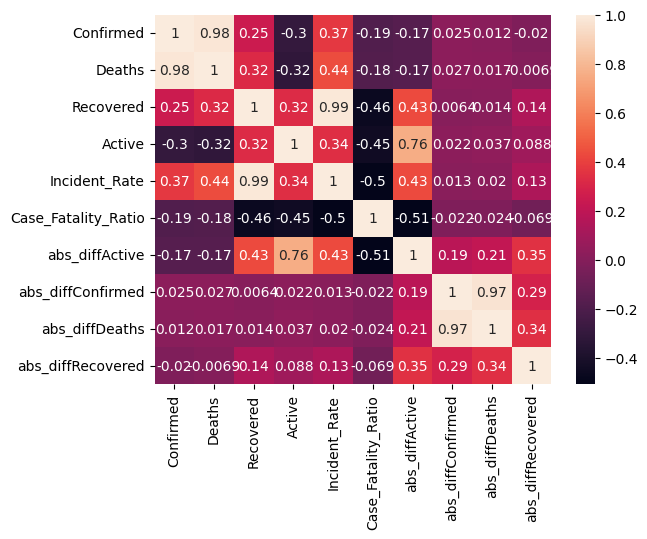

In [23]:
sns.heatmap(updated_df.corr(numeric_only = True),annot=True)

In [24]:
updated_df.max()

FIPS                         12-31-2022
Province_State               Tamil Nadu
Last_Update            31-12-2022 04:20
Confirmed                       3595123
Deaths                            38049
Recovered                     2513087.0
Active                         313048.0
Incident_Rate               3298.251813
Case_Fatality_Ratio            1.726175
abs_diffActive              16816.18271
abs_diffConfirmed             2775495.0
abs_diffDeaths                  36469.0
abs_diffRecovered             1709759.0
dtype: object

In [25]:
updated_df.min()

FIPS                         01-01-2021
Province_State               Tamil Nadu
Last_Update            01-01-2021 05:23
Confirmed                         34914
Deaths                              307
Recovered                       18325.0
Active                       3300.81729
Incident_Rate                 44.852816
Case_Fatality_Ratio            0.879303
abs_diffActive                      0.0
abs_diffConfirmed                   0.0
abs_diffDeaths                      0.0
abs_diffRecovered                   0.0
dtype: object

In [26]:
# abs_diffActive 	abs_diffConfirmed 	abs_diffDeaths 	abs_diffRecovered
#X = updated_df[['abs_diffConfirmed', 'abs_diffDeaths', 'abs_diffRecovered','Incident_Rate','Case_Fatality_Ratio']]
#y = updated_df['abs_diffActive'] 
X = df[['Confirmed', 'Deaths', 'Recovered']]# 'Incident_Rate','Case_Fatality_Ratio'
y = df['Active'] 

In [27]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

x_train, x_test,y_train,y_test = train_test_split(X,y,train_size=0.75)
# print the data
x_train

,Confirmed,Deaths,Recovered
245,2720271,36375,803328.0
4,814170,12069,793154.0
136,343945,5886,283937.0
117,457697,7748,398366.0
256,2711584,36247,803328.0
...,...,...,...
532,841797,12383,825025.0
905,3325940,37544,803328.0
236,2726917,36481,803328.0
323,2621086,35000,803328.0


In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train,y_train)

In [29]:
model.predict(x_test)

array([ 34992.78844653, -10013.06494121, -12714.25724112,  44802.33554932,
        35381.96173206,  40410.64599937, -13296.36627769,  12710.16261349,
        34960.5536656 ,  34868.07051039,   7663.32777125,   8148.4312499 ,
        42896.41026288,  63837.064105  ,  45390.16640459,  12552.32276038,
        78326.22024063,  45882.61282178,  79246.76870907,  43000.81065649,
        37650.49424096,  12291.75983621,  38651.22744845,   7158.80759271,
        10236.98953115, -14043.46737641,   7450.17137517,  78432.92188327,
         8997.72478263,  12703.05472312,  43292.78138083,  75186.80876092,
       -11721.66760567,  44498.72451115,  12491.92577099,  43332.0886558 ,
        12311.39688928,  41767.07498951,  35408.1377947 ,  38226.85055589,
        -6126.24592194,  81233.43500578,   7107.01156581,  35854.41491038,
        71517.71798116,  58864.18936728,  12740.36110819,  54307.80042536,
         7067.54007237,   7505.5085104 ,  52928.99931   ,  42045.88135221,
        35042.08895433,  

In [30]:
model.score(x_train,y_train)

0.33641867822254357

In [31]:
 print(f"intercept: {model.intercept_}")

intercept: 35498.262091195254


In [32]:
print(f"coefficients: {model.coef_}")

coefficients: [ 0.04015757 -5.4809952   0.05156016]


In [33]:
y_pred = model.predict(x_test)

In [34]:
from sklearn.metrics import r2_score
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 35.68


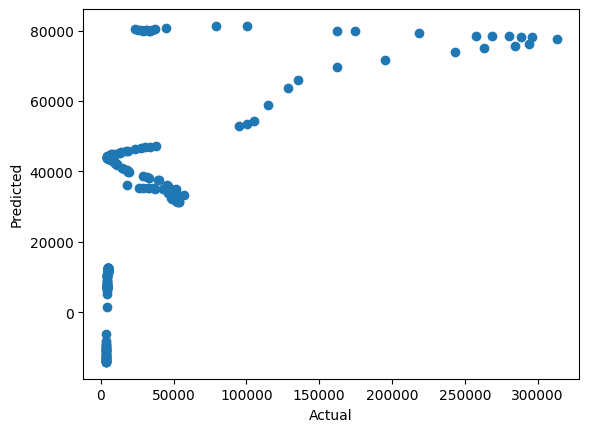

In [35]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<AxesSubplot:xlabel='Active'>

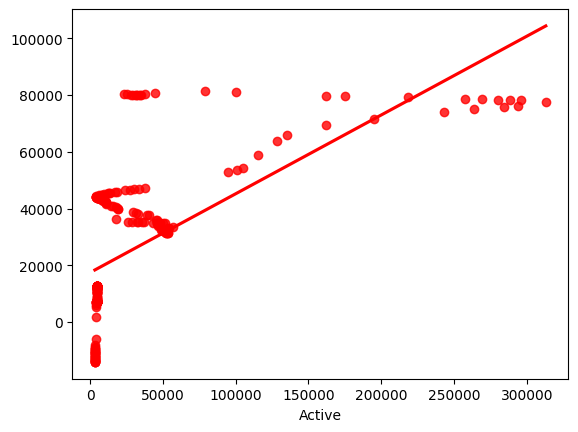

In [36]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [37]:
pred_df=pandas.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
169,47343.000000,34992.788447,12350.211553
316,3381.536685,-10013.064941,13394.601626
263,3475.724515,-12714.257241,16189.981756
493,6222.000000,44802.335549,-38580.335549
188,32308.000000,35381.961732,-3073.961732
...,...,...,...
162,51765.000000,32539.520144,19225.479856
994,4617.749863,12718.595704,-8100.845841
519,4120.000000,44127.197822,-40007.197822
610,4616.964932,12694.059427,-8077.094495


In [38]:
# max values
# FIPS                         12-31-2022
# Province_State               Tamil Nadu
# Last_Update            31-12-2022 04:20
# Confirmed                       3595123
# Deaths                            38049
# Recovered                     2513087.0
# Active                         313048.0
# Incident_Rate               3298.251813
# Case_Fatality_Ratio            1.726175
# abs_diffActive              16816.18271
# abs_diffConfirmed             2775495.0
# abs_diffDeaths                  36469.0
# abs_diffRecovered        1589924.061758
# dtype: obje

In [39]:
# min values
# FIPS                         01-01-2021
# Province_State               Tamil Nadu
# Last_Update            01-01-2021 05:23
# Confirmed                         34914
# Deaths                              307
# Recovered                       18325.0
# Active                       3300.81729
# Incident_Rate                 44.852816
# Case_Fatality_Ratio            0.879303
# abs_diffActive                      0.0
# abs_diffConfirmed                   0.0
# abs_diffDeaths                      0.0
# abs_diffRecovered                   0.0
# dtype: object

In [40]:
x_new = pandas.DataFrame({'Confirmed': np.random.randint(34914, 3595123, 50),
               'Deaths': np.random.randint(307, 38049, 50),
               'Recovered': np.random.uniform(18325.0, 2513087.0, 50)})
#                'Incident_Rate': np.random.uniform(44.852816, 3298.251813, 50),
#                'Case_Fatality_Ratio': np.random.uniform(0.879303, 1.726175, 50)})

# x_new = pandas.DataFrame({'abs_diffConfirmed': np.random.randint(0.0, 2775495.0, 50),
#                'abs_diffDeaths': np.random.randint(0.0, 36469.0, 50),
#                'abs_diffRecovered': np.random.uniform(0.0, 1589924.061758, 50),
#                'Incident_Rate': np.random.uniform(44.852816, 3298.251813, 50),
#                'Case_Fatality_Ratio': np.random.uniform(0.879303, 1.726175, 50)})

#x_new = np.arange(5).reshape((-1, 5))

In [41]:
x_new

,Confirmed,Deaths,Recovered
0,3521439,4356,9.248424e+04
1,2783161,8203,1.903406e+06
2,3592369,1838,1.946247e+06
3,133075,35970,1.761224e+06
4,2124578,28410,1.276443e+06
5,1907046,7953,1.545476e+06
6,2731438,7469,1.274793e+05
7,249945,25802,1.308783e+06
8,230450,15577,2.416511e+06
9,2883299,34807,1.067899e+06


In [42]:
y_new = model.predict(x_new) 

In [43]:
y_new

array([ 1.57803992e+05,  2.00442553e+05,  2.70033836e+05, -6.55001726e+04,
        3.09146971e+04,  1.48175239e+05,  1.10821482e+05, -2.84041149e+04,
        8.39708361e+04,  1.55686064e+04, -6.12627698e+04,  1.42204927e+05,
        7.24478689e+04,  1.03069791e+05,  4.72962648e+02, -7.92214166e+04,
        9.40930622e+04,  2.38220179e+05, -1.10753901e+05, -5.91635330e+04,
        1.43567152e+04, -6.60909516e+04,  2.39557162e+05,  2.07205032e+05,
        1.10417293e+05,  8.89923012e+04,  9.92030150e+04,  1.80921854e+03,
        3.38931470e+04,  1.43734321e+05,  1.87824517e+05, -4.19307407e+04,
        2.05474885e+05,  1.40501275e+05, -3.08811735e+04, -6.45476554e+04,
        1.18944389e+05,  8.01800549e+03,  8.96880219e+04,  4.62712095e+04,
       -6.76373908e+04,  1.33472668e+05, -1.22591635e+02,  1.83374227e+05,
        4.21520426e+03,  1.32792241e+05,  5.72775975e+04, -1.22559266e+04,
        1.21926229e+05,  1.81049540e+05])

In [44]:
model.score(x_new,y_new)

1.0

In [ ]:
import numpy as np

rmse = np.sqrt(np.mean((y_pred - y_true)**2))
rmse_percentage = (rmse / np.mean(y_true)) * 100